# Data Exploration

In [408]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [409]:
# read in clean_data from data_cleaning.ipynb
%store -r clean_data

In [410]:
# check if clean_data loaded in correctly
clean_data.head()

,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),...,"Population age distribution (0-14 / 60+ years, %)-60+ years",International migrant stock (000/% of total pop.)-in thousands,International migrant stock (000/% of total pop.)-as % of total pop,CO2 emission estimates (million tons/tons per capita)-million tons,CO2 emission estimates (million tons/tons per capita)-tons per capita,"Pop. using improved drinking water (urban/rural, %)-Urban","Pop. using improved drinking water (urban/rural, %)-Rural","Pop. using improved sanitation facilities (urban/rural, %)-Urban",country,Region
0,652864.0,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,...,4.1,382.4,1.2,9.8,0.3,78.2,47.0,45.1,Afghanistan,SouthernAsia
1,28748.0,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,...,19.0,57.6,2.0,5.7,2.0,94.9,95.2,95.5,Albania,SouthernEurope
2,2381741.0,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,...,9.4,242.4,0.6,145.4,3.7,84.3,81.8,89.8,Algeria,NorthernAfrica
4,468.0,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,...,19.0,42.1,59.7,0.5,6.4,100.0,100.0,100.0,Andorra,SouthernEurope
5,1246700.0,29784,23.9,96.2,117955,3.0,4714.1,6.8,51.2,42.0,...,4.0,106.8,0.4,34.8,1.4,75.4,28.2,88.6,Angola,MiddleAfrica


***EDA questions we can answer***

Compound columns we can create:
1. CO2 / km^2 calculated using CO2 and km^2
2. 

***Univariate analysis***
Col categories:
1. Economy
2. Health
3. Education
4. Environment
5. Obsolete

<b>Questions we can ask:</b><br>
Which countries are at the bottom in the various categories
Which categories can be overlooked due to high correlation with other categories

***multi-variate***

<b>Questions we can ask:</b><br>


1. Is there any past financial aid data that we can look into to see which columns are highyly correlated to it?
2. What is the general relationship between poverty and certain columns


*** Correlation matrix ***  
Some columns will have extremely high correlation like income and gdp for example. So from here we will drop the redundant columns.

<AxesSubplot:>

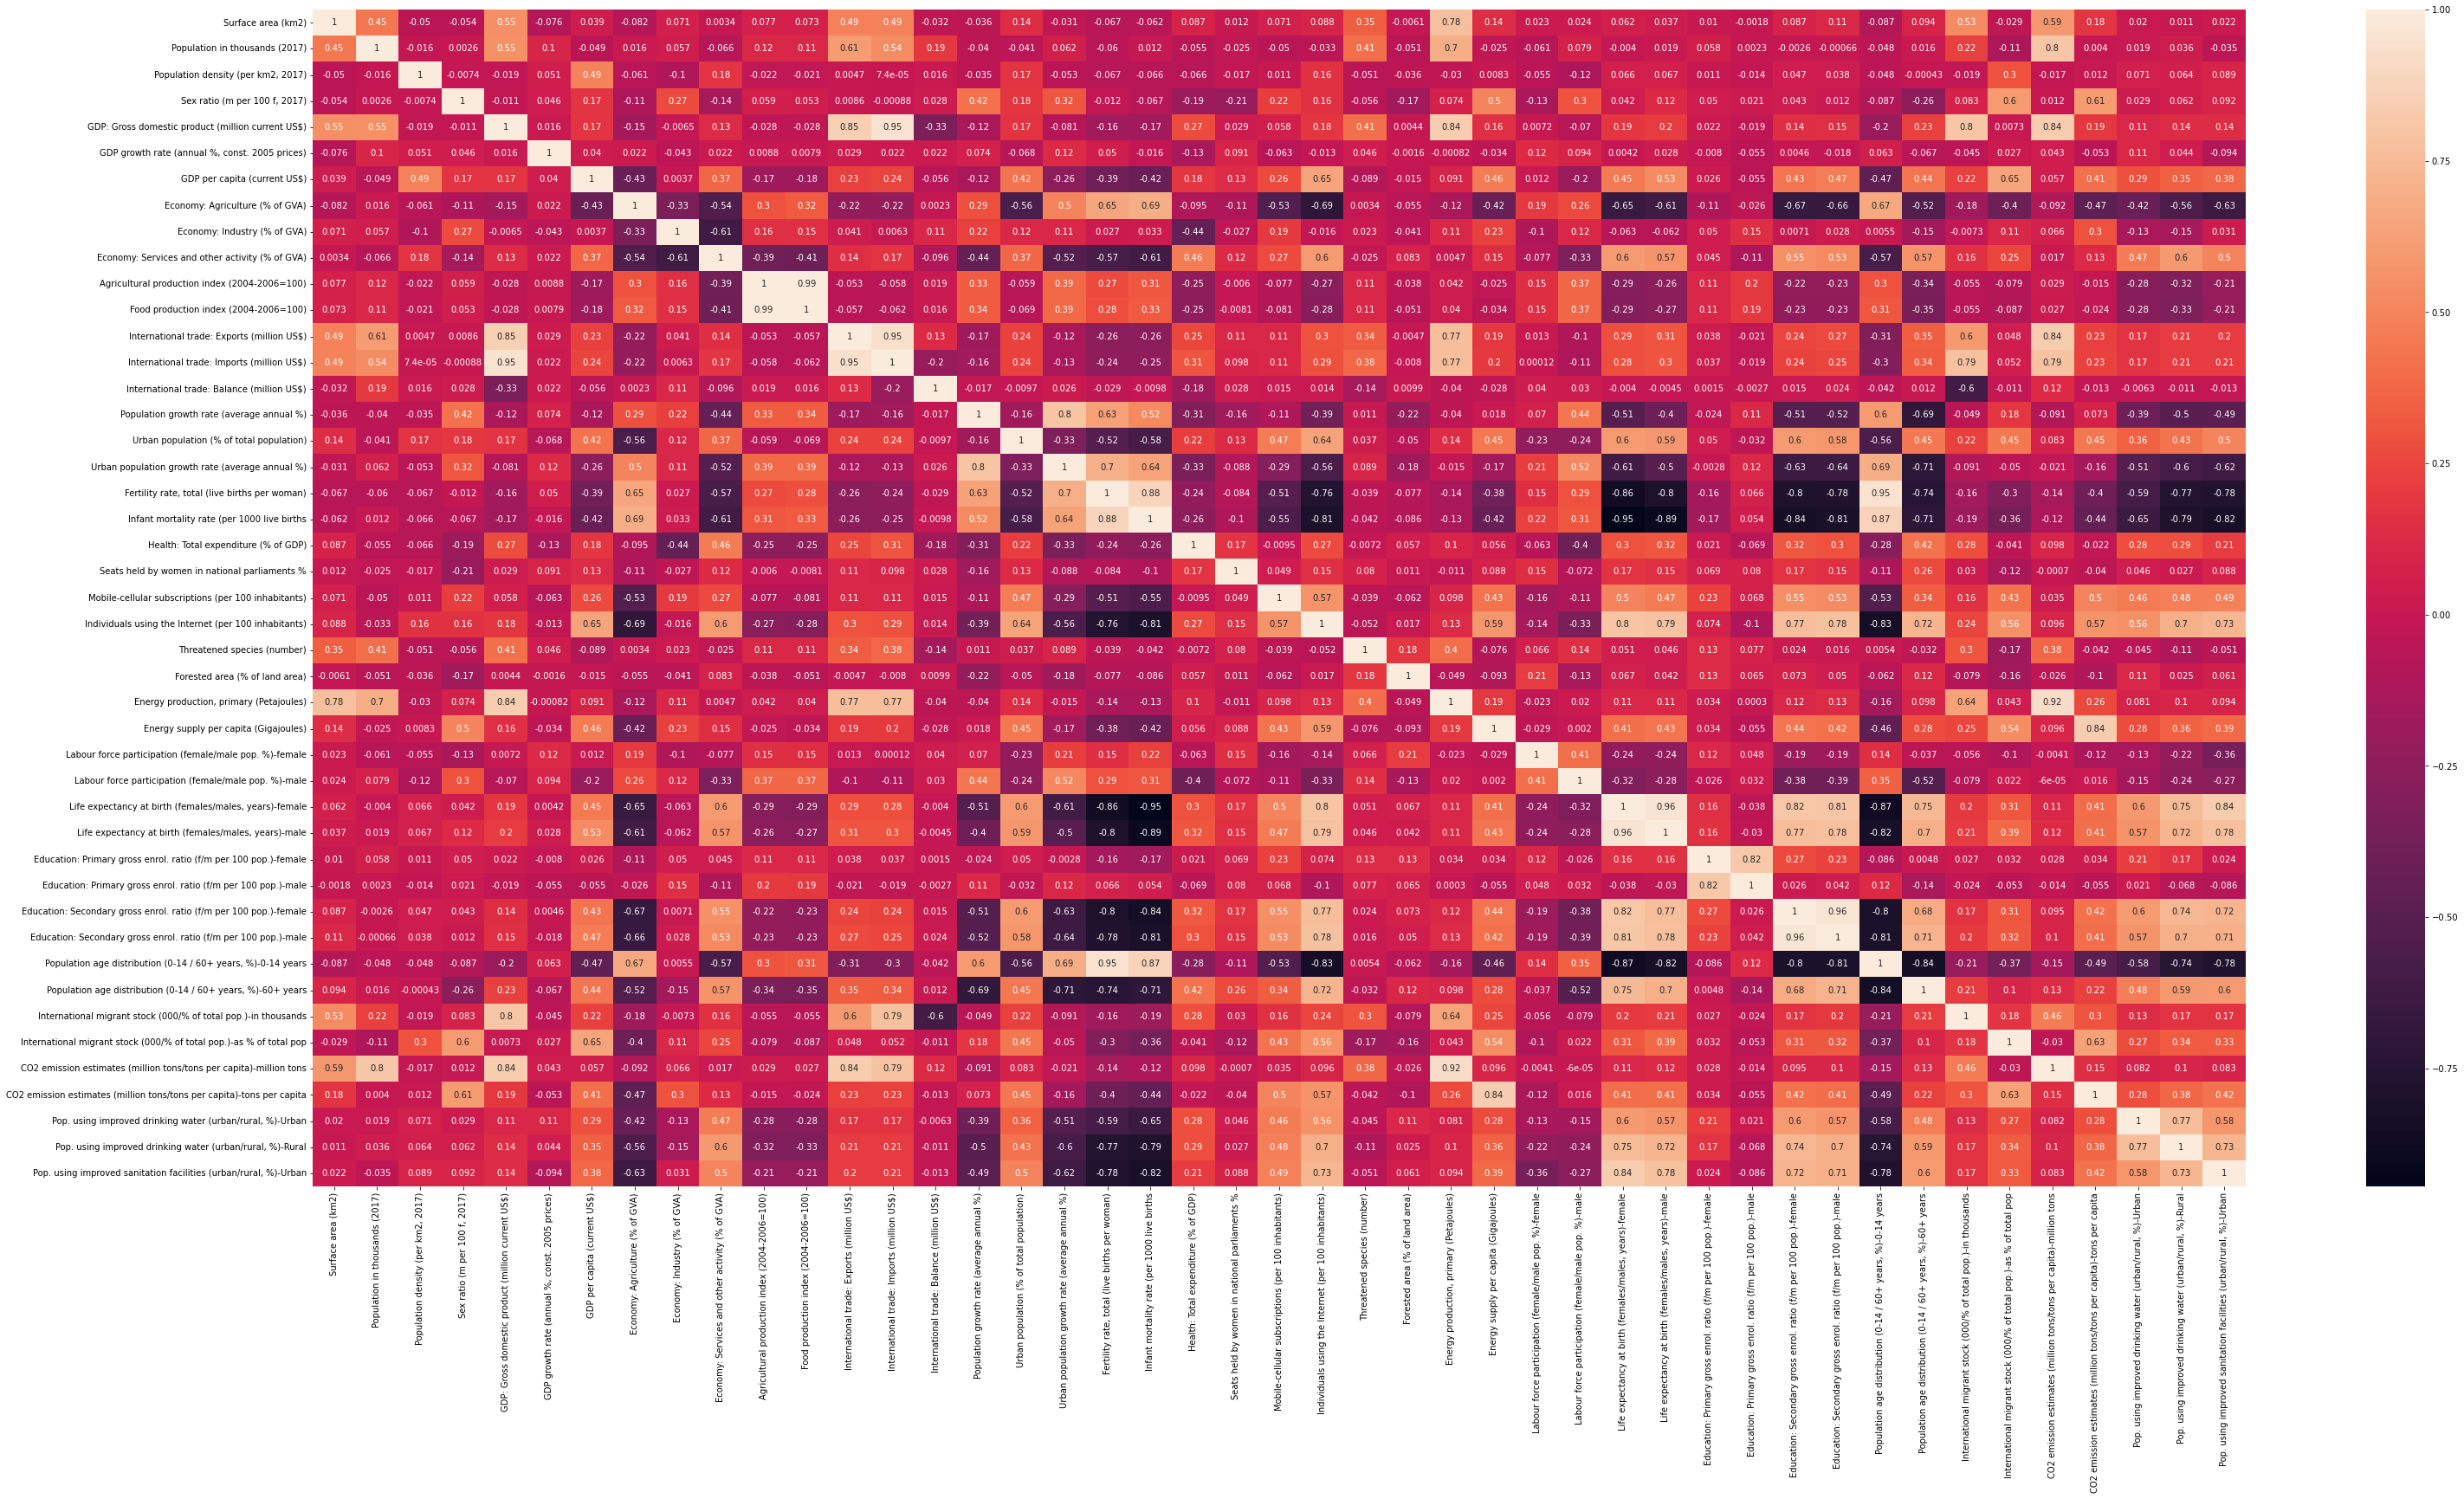

In [411]:
# correlation matrix
# Calculate the correlation between the different columns
plt.figure(figsize=(50,25))
sb.heatmap(clean_data.corr(method='pearson', min_periods=1),annot=True)

In [412]:
# Create correlation matrix

corr_matrix = clean_data.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] >= 0.7)]
count=1
print("Colums with a correlation coefficient: 0.7 and more ")
print()
for i in to_drop:
   print(count, end='') 
   print(")",end=" ")
   print(i)
   print()
   count+=1

Colums with a correlation coefficient: 0.7 and more 

1) Food production index (2004-2006=100)

2) International trade: Exports (million US$)

3) International trade: Imports (million US$)

4) Urban population growth rate (average annual %)

5) Fertility rate, total (live births per woman)

6) Infant mortality rate (per 1000 live births

7) Individuals using the Internet (per 100 inhabitants)

8) Energy production, primary (Petajoules)

9) Life expectancy at birth (females/males, years)-female

10) Life expectancy at birth (females/males, years)-male

11) Education: Primary gross enrol. ratio (f/m per 100 pop.)-male

12) Education: Secondary gross enrol. ratio (f/m per 100 pop.)-female

13) Education: Secondary gross enrol. ratio (f/m per 100 pop.)-male

14) Population age distribution (0-14 / 60+ years, %)-0-14 years

15) Population age distribution (0-14 / 60+ years, %)-60+ years

16) International migrant stock (000/% of total pop.)-in thousands

17) CO2 emission estimates (million 

In [413]:
# keeping some important columns such as infant mortality rate that is indicative of a country's population's health
to_drop1=to_drop.copy()
to_drop1.remove("Life expectancy at birth (females/males, years)-female")
to_drop1.remove("Life expectancy at birth (females/males, years)-male")
to_drop1.remove("Infant mortality rate (per 1000 live births")
to_drop1.remove("Pop. using improved drinking water (urban/rural, %)-Rural")
to_drop1.remove("Education: Primary gross enrol. ratio (f/m per 100 pop.)-male")

In [414]:
# duplicating data frame and dropping the columns
raw_data1=clean_data.copy()
raw_data1.drop(to_drop1, axis=1, inplace=True)

In [415]:
# to check whether the data has been dropped
raw_data1.head()

,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),...,Labour force participation (female/male pop. %)-male,"Life expectancy at birth (females/males, years)-female","Life expectancy at birth (females/males, years)-male",Education: Primary gross enrol. ratio (f/m per 100 pop.)-female,Education: Primary gross enrol. ratio (f/m per 100 pop.)-male,International migrant stock (000/% of total pop.)-as % of total pop,"Pop. using improved drinking water (urban/rural, %)-Urban","Pop. using improved drinking water (urban/rural, %)-Rural",country,Region
0,652864.0,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,...,83.60,63.50,61.0,91.1,131.6,1.2,78.2,47.0,Afghanistan,SouthernAsia
1,28748.0,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,...,61.00,79.90,75.6,111.7,115.5,2.0,94.9,95.2,Albania,SouthernEurope
2,2381741.0,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,...,70.70,76.50,74.1,112.7,119.5,0.6,84.3,81.8,Algeria,NorthernAfrica
4,468.0,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,...,74.25,75.75,69.7,102.1,103.5,59.7,100.0,100.0,Andorra,SouthernEurope
5,1246700.0,29784,23.9,96.2,117955,3.0,4714.1,6.8,51.2,42.0,...,77.10,63.00,57.4,100.4,156.9,0.4,75.4,28.2,Angola,MiddleAfrica


***Dropping more columns***   
1) Based on observations: certain columns are under the same umbrella theme for example Population in thousands, population density, etc inform about a country's population
2) Hence some of these columns can be removed/ combined to provide a more succint data set


In [416]:
#Finding columns with common strings 
def common(string_name):
  a=string_name+"_cols"
  print(a)
  print("---------")
  a = [col for col in raw_data1.columns if string_name in col]
  for i in a:
    print(i)
  print()
common("GDP")
common("Health")
common("Pop")
common("Labour")

GDP_cols
---------
GDP: Gross domestic product (million current US$)
GDP growth rate (annual %, const. 2005 prices)
GDP per capita (current US$)
Health: Total expenditure (% of GDP)

Health_cols
---------
Health: Total expenditure (% of GDP)

Pop_cols
---------
Population in thousands (2017)
Population density (per km2, 2017)
Population growth rate (average annual %)
Pop. using improved drinking water (urban/rural, %)-Urban
Pop. using improved drinking water (urban/rural, %)-Rural

Labour_cols
---------
Labour force participation (female/male pop. %)-female
Labour force participation (female/male pop. %)-male



In [417]:
common("Economy")

Economy_cols
---------
Economy: Agriculture (% of GVA)
Economy: Industry (% of GVA)
Economy: Services and other activity (% of GVA)



***Dropping certain columns***  
1) GDP columns  
- GDP per capita indicates the average income for each person providing a more accurate indicator rather than GDP that does not take into account population size of a country   
- GDP growth rate shows the economic growth of the country however this would be a poor indicator as developed countries tend to have lower gdp growth rate while even poorer countries may have a low gdp growth rate. Hence there would be no obvious trend 
2) Health column
- The total expenditure is indicative of how much the government allocates to health spending. This can help provide more information on which country needs more funding to increase expenditure on health. 
3) Population column  
- There is no obvious pattern/distinction in the  population density and population between underdevolped, developing and developed countries  
- Population growth rate indicates which countries have rapidly increasing population, therefore, indicating a greater need for financial aid to meet the increasing needs
- Population using improved drinking water-urban and rural can be combined to give a good indicators of a country's condition 
4) Labour column  
- Labour force participation female and labour force participation male can be combined to determine the average labour force participation across the two genders
5) Economy column  
- Individuals in underdeveloped countries tend to engage more in agriculture and farming hence economy: % agriculture would have a more distinct pattern   
   
Dropped columns:
***GDP growth rate (annual %, const. 2005 prices), GDP: Gross domestic product (million current US$), Health: Physicians (per 1000 pop.), Population in thousands (2017), Population density (per km2, 2017), Education: Primary gross enrol. ratio (f/m per 100 pop.)-female, Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA)***

In [418]:
# dropping the columns
col_to_drop=["GDP growth rate (annual %, const. 2005 prices)", "GDP: Gross domestic product (million current US$)","Population in thousands (2017)", "Population density (per km2, 2017)",  "Economy: Industry (% of GVA)","Economy: Services and other activity (% of GVA)"]
raw_data2=raw_data1.copy()
raw_data2.drop(col_to_drop, axis=1, inplace=True)

In [419]:
# checking whether the data has been dropped
print(raw_data2)


     Surface area (km2)  Sex ratio (m per 100 f, 2017)  \
0              652864.0                          106.3   
1               28748.0                          101.9   
2             2381741.0                          102.0   
4                 468.0                          102.3   
5             1246700.0                           96.2   
..                  ...                            ...   
222            912050.0                           99.0   
223            330967.0                           98.0   
226            527968.0                          102.1   
227            752612.0                           98.5   
228            390757.0                           95.0   

     GDP per capita (current US$)  Economy: Agriculture (% of GVA)  \
0                           623.2                             23.3   
1                          3984.2                             22.4   
2                          4154.1                             12.2   
4                      

In [427]:
# combining labour force participation-male and female into one column
raw_data2["Average labour force participation"]=(raw_data2["Labour force participation (female/male pop. %)-female"]+
raw_data2["Labour force participation (female/male pop. %)-male"])/2
# combining Life expectancy at birth (females/males, years)-female and Life expectancy at birth (females/males, years)-male
raw_data2["Average life expectancy"]=(raw_data2["Life expectancy at birth (females/males, years)-female"]+
raw_data2["Life expectancy at birth (females/males, years)-male"])/2
# combining Pop. using improved drinking water (urban/rural, %)-Urban and Pop. using improved drinking water (urban/rural, %)-Rural
raw_data2["Average pop. using improved drinking water"]=(raw_data2["Pop. using improved drinking water (urban/rural, %)-Urban"]+raw_data2["Pop. using improved drinking water (urban/rural, %)-Rural"])/2
# combining Education: Primary gross enrol. ratio (f/m per 100 pop.)-female	and Education: Primary gross enrol. ratio (f/m per 100 pop.)-male
raw_data2["Average Education: Primary gross enrol"]=(raw_data2["Education: Primary gross enrol. ratio (f/m per 100 pop.)-female"]+
raw_data2["Education: Primary gross enrol. ratio (f/m per 100 pop.)-male"])/2
#dropping the columns
drop=["Labour force participation (female/male pop. %)-female","Labour force participation (female/male pop. %)-male", "Life expectancy at birth (females/males, years)-female","Life expectancy at birth (females/males, years)-male","Pop. using improved drinking water (urban/rural, %)-Urban","Pop. using improved drinking water (urban/rural, %)-Rural","Education: Primary gross enrol. ratio (f/m per 100 pop.)-female","Education: Primary gross enrol. ratio (f/m per 100 pop.)-male"]
raw_data3= raw_data2.copy()
raw_data3.drop(drop, axis=1, inplace=True)



In [428]:
#checking if data has been dropped
raw_data3.shape


(191, 22)

***Further removing redundant columns***  
1) Surface area (km2): simply indicates a country's size does not have a clear relation to financial aid  
2) Sex ratio (m per 100 f, 2017): simply indicates a country's gender ratio does not have a clear relation to financial aid  
3) Seats held by women in national parliaments % : indicative of woman representation rather than country's condition  
4) Threatened species (number) : has to do with animals with no distinct pattern between different countries  
5) Forested area (% of land area): simply indicative of which countries has more forested area
6) International migrant stock (000/% of total pop.)-as % of total pop: simply indicates the number of people born in a country other than that in which they live
7) Agricultural production index (2004-2006=100):  measure of agricultural output changes


In [429]:
raw_data4= raw_data3.copy()
col_drop=["Surface area (km2)","Sex ratio (m per 100 f, 2017)","Seats held by women in national parliaments %","Threatened species (number)","Forested area (% of land area)","International migrant stock (000/% of total pop.)-as % of total pop","Agricultural production index (2004-2006=100)"]
raw_data4.drop(col_drop, axis=1, inplace=True)

In [430]:
# checking if columns has been dropped
raw_data4.shape

(191, 15)

### Data description of selected columns  
1) GDP per capita (current US$): Calculated as the Total GDP divided by the total population	
2) Economy: Agriculture (% of GVA): Indicates the propotion of money(gross-value added) the country earns from agriculture goods		
3) International trade: Balance (million US$): Difference in a country's imports and exports	
4) Population growth rate (average annual %): indicates how fast a country's population is growing	
5) Urban population (% of total population): propotion of urban population to total population	
6) Infant mortality rate (per 1000 live births): The average number of years a new born child would live if the current mortality patterns are to remain the same  
7) Health: Total expenditure (% of GDP): Shows the percentage of income government spends on healthcare   
8) Mobile-cellular subscriptions (per 100 inhabitants): Shows the number of people who use mobile phones 
9) Energy supply per capita (Gigajoules): per capita expression of how much energy use there is in a given country or area
10) Country	
11) Region: the region the country belongs to
12) Average labour force participation: Shows the percentage of the civilian noninstitutional population 16 years and older that is working or actively looking for work.
13) Average life expectancy: The average period an individual is expected to live
14) Average pop. using improved drinking water: population that has access to clean water
15) Average education primary gross enrol: number of students enrolled in a given level of education regardless of age by the population of the age group 

In [431]:
# quick view of columns and values
raw_data4.head()
print(raw_data4)

     GDP per capita (current US$)  Economy: Agriculture (% of GVA)  \
0                           623.2                             23.3   
1                          3984.2                             22.4   
2                          4154.1                             12.2   
4                         39896.4                              0.5   
5                          4714.1                              6.8   
..                            ...                              ...   
222                       11068.9                              5.3   
223                        2067.9                             18.9   
226                        1106.4                             14.7   
227                        1311.1                              8.2   
228                         890.4                             13.0   

     International trade: Balance (million US$)  \
0                                       -2110.0   
1                                       -2707.0   
2     

In [432]:
# standard statistical measures
raw_data4.describe(percentiles = [.25, .5, .75, .90 ,.95, .99])

,GDP per capita (current US$),Economy: Agriculture (% of GVA),International trade: Balance (million US$),Population growth rate (average annual %),Urban population (% of total population),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Mobile-cellular subscriptions (per 100 inhabitants),Energy supply per capita (Gigajoules),Average labour force participation,Average life expectancy,Average pop. using improved drinking water,Average Education: Primary gross enrol
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,14192.967016,12.006545,-496.094241,1.405236,57.165969,26.182723,6.786911,105.422513,85.727749,63.211024,70.999869,89.485340,103.418770
std,23460.674919,12.023846,76727.104751,1.373039,23.601700,22.882189,2.781421,39.605211,122.317530,10.555227,7.964572,12.856027,14.323447
min,144.500000,0.000000,-796494.000000,-2.300000,8.400000,1.600000,1.500000,7.000000,2.000000,35.915000,49.400000,39.200000,23.345000
25%,1795.450000,2.700000,-3748.000000,0.450000,38.600000,8.250000,4.900000,79.100000,20.000000,56.150000,65.525000,84.400000,99.225000
50%,5105.800000,7.950000,-1079.000000,1.200000,58.600000,18.000000,6.400000,108.200000,46.000000,63.550000,72.750000,94.900000,102.950000
75%,15562.300000,18.950000,309.000000,2.200000,76.950000,43.350000,8.400000,129.800000,100.500000,68.825000,76.475000,99.475000,108.977500
90%,41686.200000,26.700000,15413.000000,3.000000,87.800000,65.400000,10.400000,157.000000,207.000000,78.250000,80.850000,100.000000,116.850000
95%,51795.600000,34.550000,46644.000000,3.300000,93.800000,69.900000,11.250000,168.950000,288.000000,82.500000,81.850000,100.000000,125.700000
99%,106731.780000,52.280000,120918.600000,6.050000,100.000000,91.430000,16.560000,189.330000,630.900000,84.779500,82.705000,100.000000,142.305000


# Univariate analysis  
Looking at the data distribution for the various columns


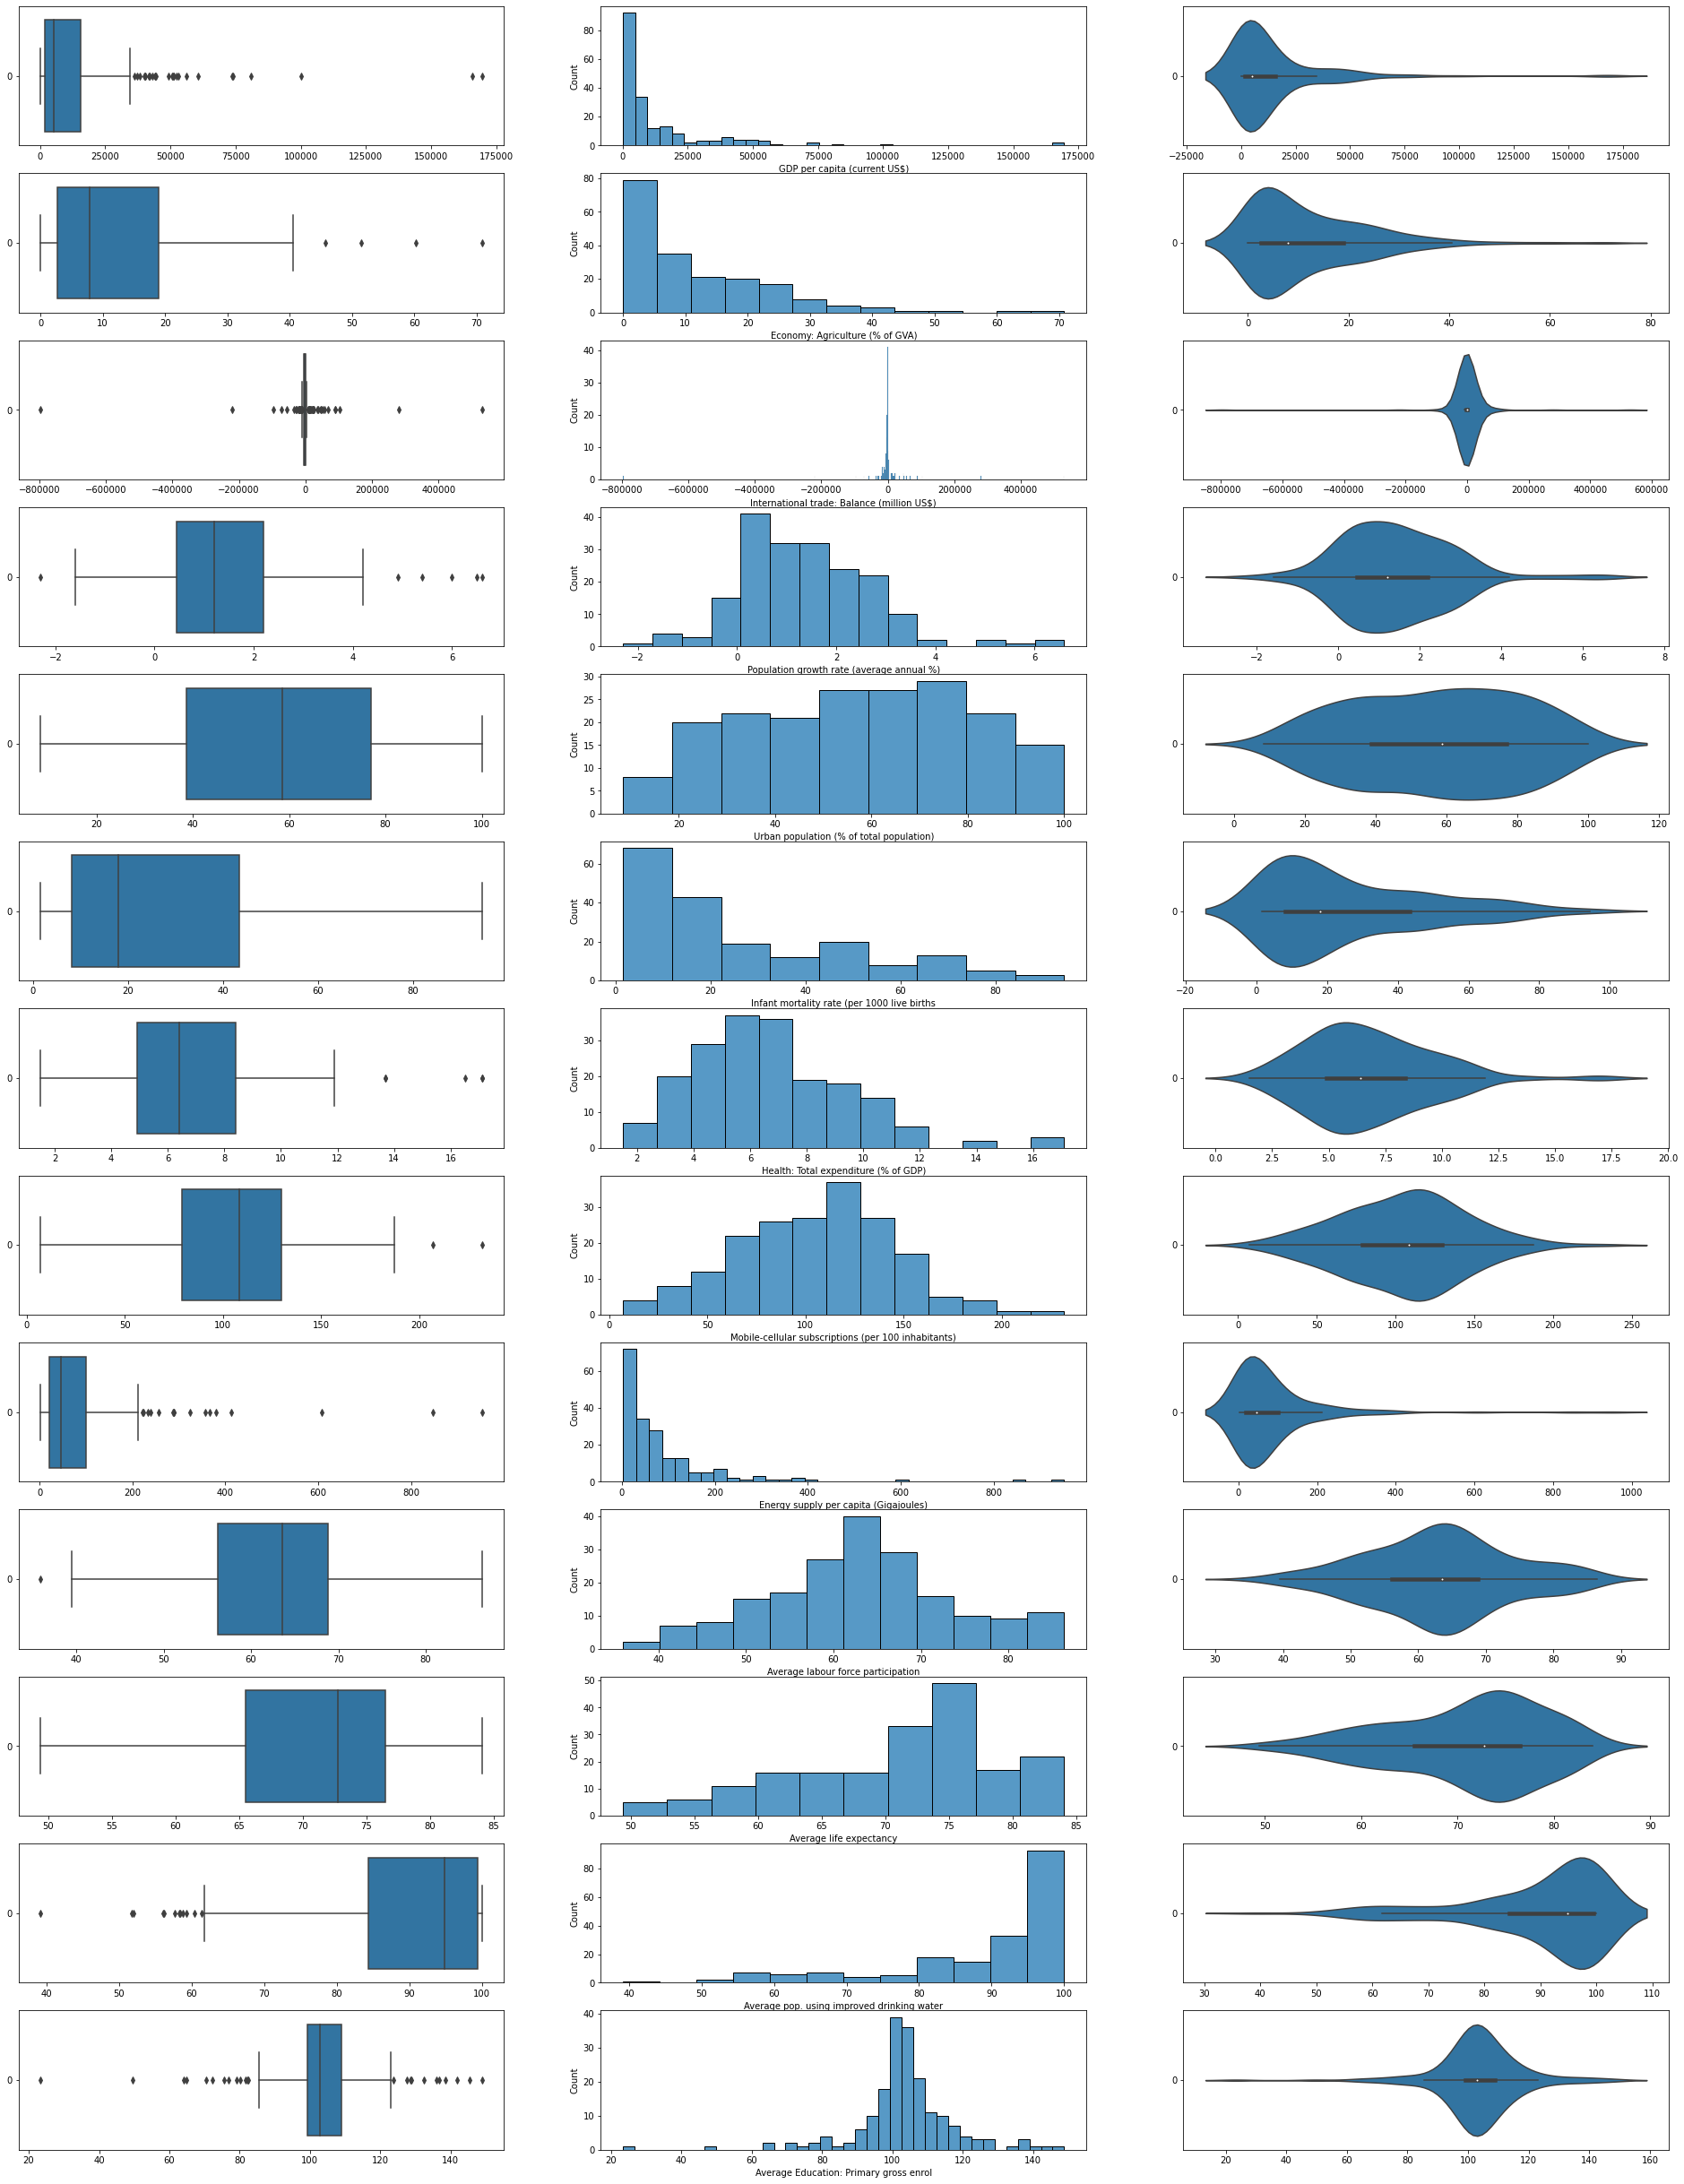

In [434]:
raw_data5=raw_data4.copy()
raw_data5.head()
raw_data5.pop("country")
raw_data5.pop("Region")
f, axes = plt.subplots(13, 3, figsize=(33, 44))
count = 0
for var in raw_data5:
    sb.boxplot(data = raw_data5[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = raw_data5[var], ax = axes[count,1])
    sb.violinplot(data = raw_data5[var], orient = "h", ax = axes[count,2])
    count += 1

***Insights***  
Most of the columns have skewed distribution and outliers  
1) GDP per capita: right skewed with multiple outliers on the higher end
2) Economy: Agriculture (% of GVA): right skewed with minimal outliers(4) at the higher end
3) International trade: Balance (million US$): approximately normally distributed(narrow distribution) with multiple outliers on bond ends 
4) Population growth rate (average annual %): slightly right skewed with minimal outliers, most of which are on the higher end
5) Urban population (% of total population): approximatey normally distributed with no outliers	
6) Infant mortality rate (per 1000 live births: right skewed with no outliers
7) Health: Total expenditure (% of GDP): slightly right skewed with minimal outliers on the higher end 	
8) Mobile-cellular subscriptions (per 100 inhabitants): approximately normally distributed with minimal outliers
9) Energy supply per capita (Gigajoules): right skewed with multiple outliers on the higher end	
10) Average labour force participation: approximately normally distributed with one out	
11) Average life expectancy: left skewed with no outliers
12) Average pop. using improved drinking water: left skewed with multiple outliers at the lower end
13) Average education primary gross enrol ratio: approximately normally distributed with multiple outliers

Looking at the data distribution we can see that there are some features that do indeed have outliers especially feautures like international trade and energy supply per capita.

- However, removing these outliers would shrink the shape of data given the already limited number of countries (191) and the under-developed countries which are in actual dire need may not contribute to the dataset.  
- Furthermore there has to be some exclusions to the outlier tretment like average pop. using improved drinking water, education as these are matters of concern so we cannot undercapp this features. 
- Hence, we can only cap certain outliers at a certain upper limit and upper limit such as gdp, international trade, etc. 
- Simply capping them to Upper and Lower Hinge of box plot may shift the cluster centroid.
- Hence, considering all the sinario we would cap the extreme values in the outliers to 0.01 and 0.99 percentile. By doing this we will be avoiding the risk of cluster overlapping.
- Most variables have outliers on the upper side except fo international trade and average population using drinking water( indicating that some countries have poor access to drinking water which is a matter of concern)
- There are very few outliers for all variables except for GDP, international trade, energy supply per capita and average population using drinking water


***Determining the top 10 countries for each variable to see whether there is any countries that are struggling in repeated regions***

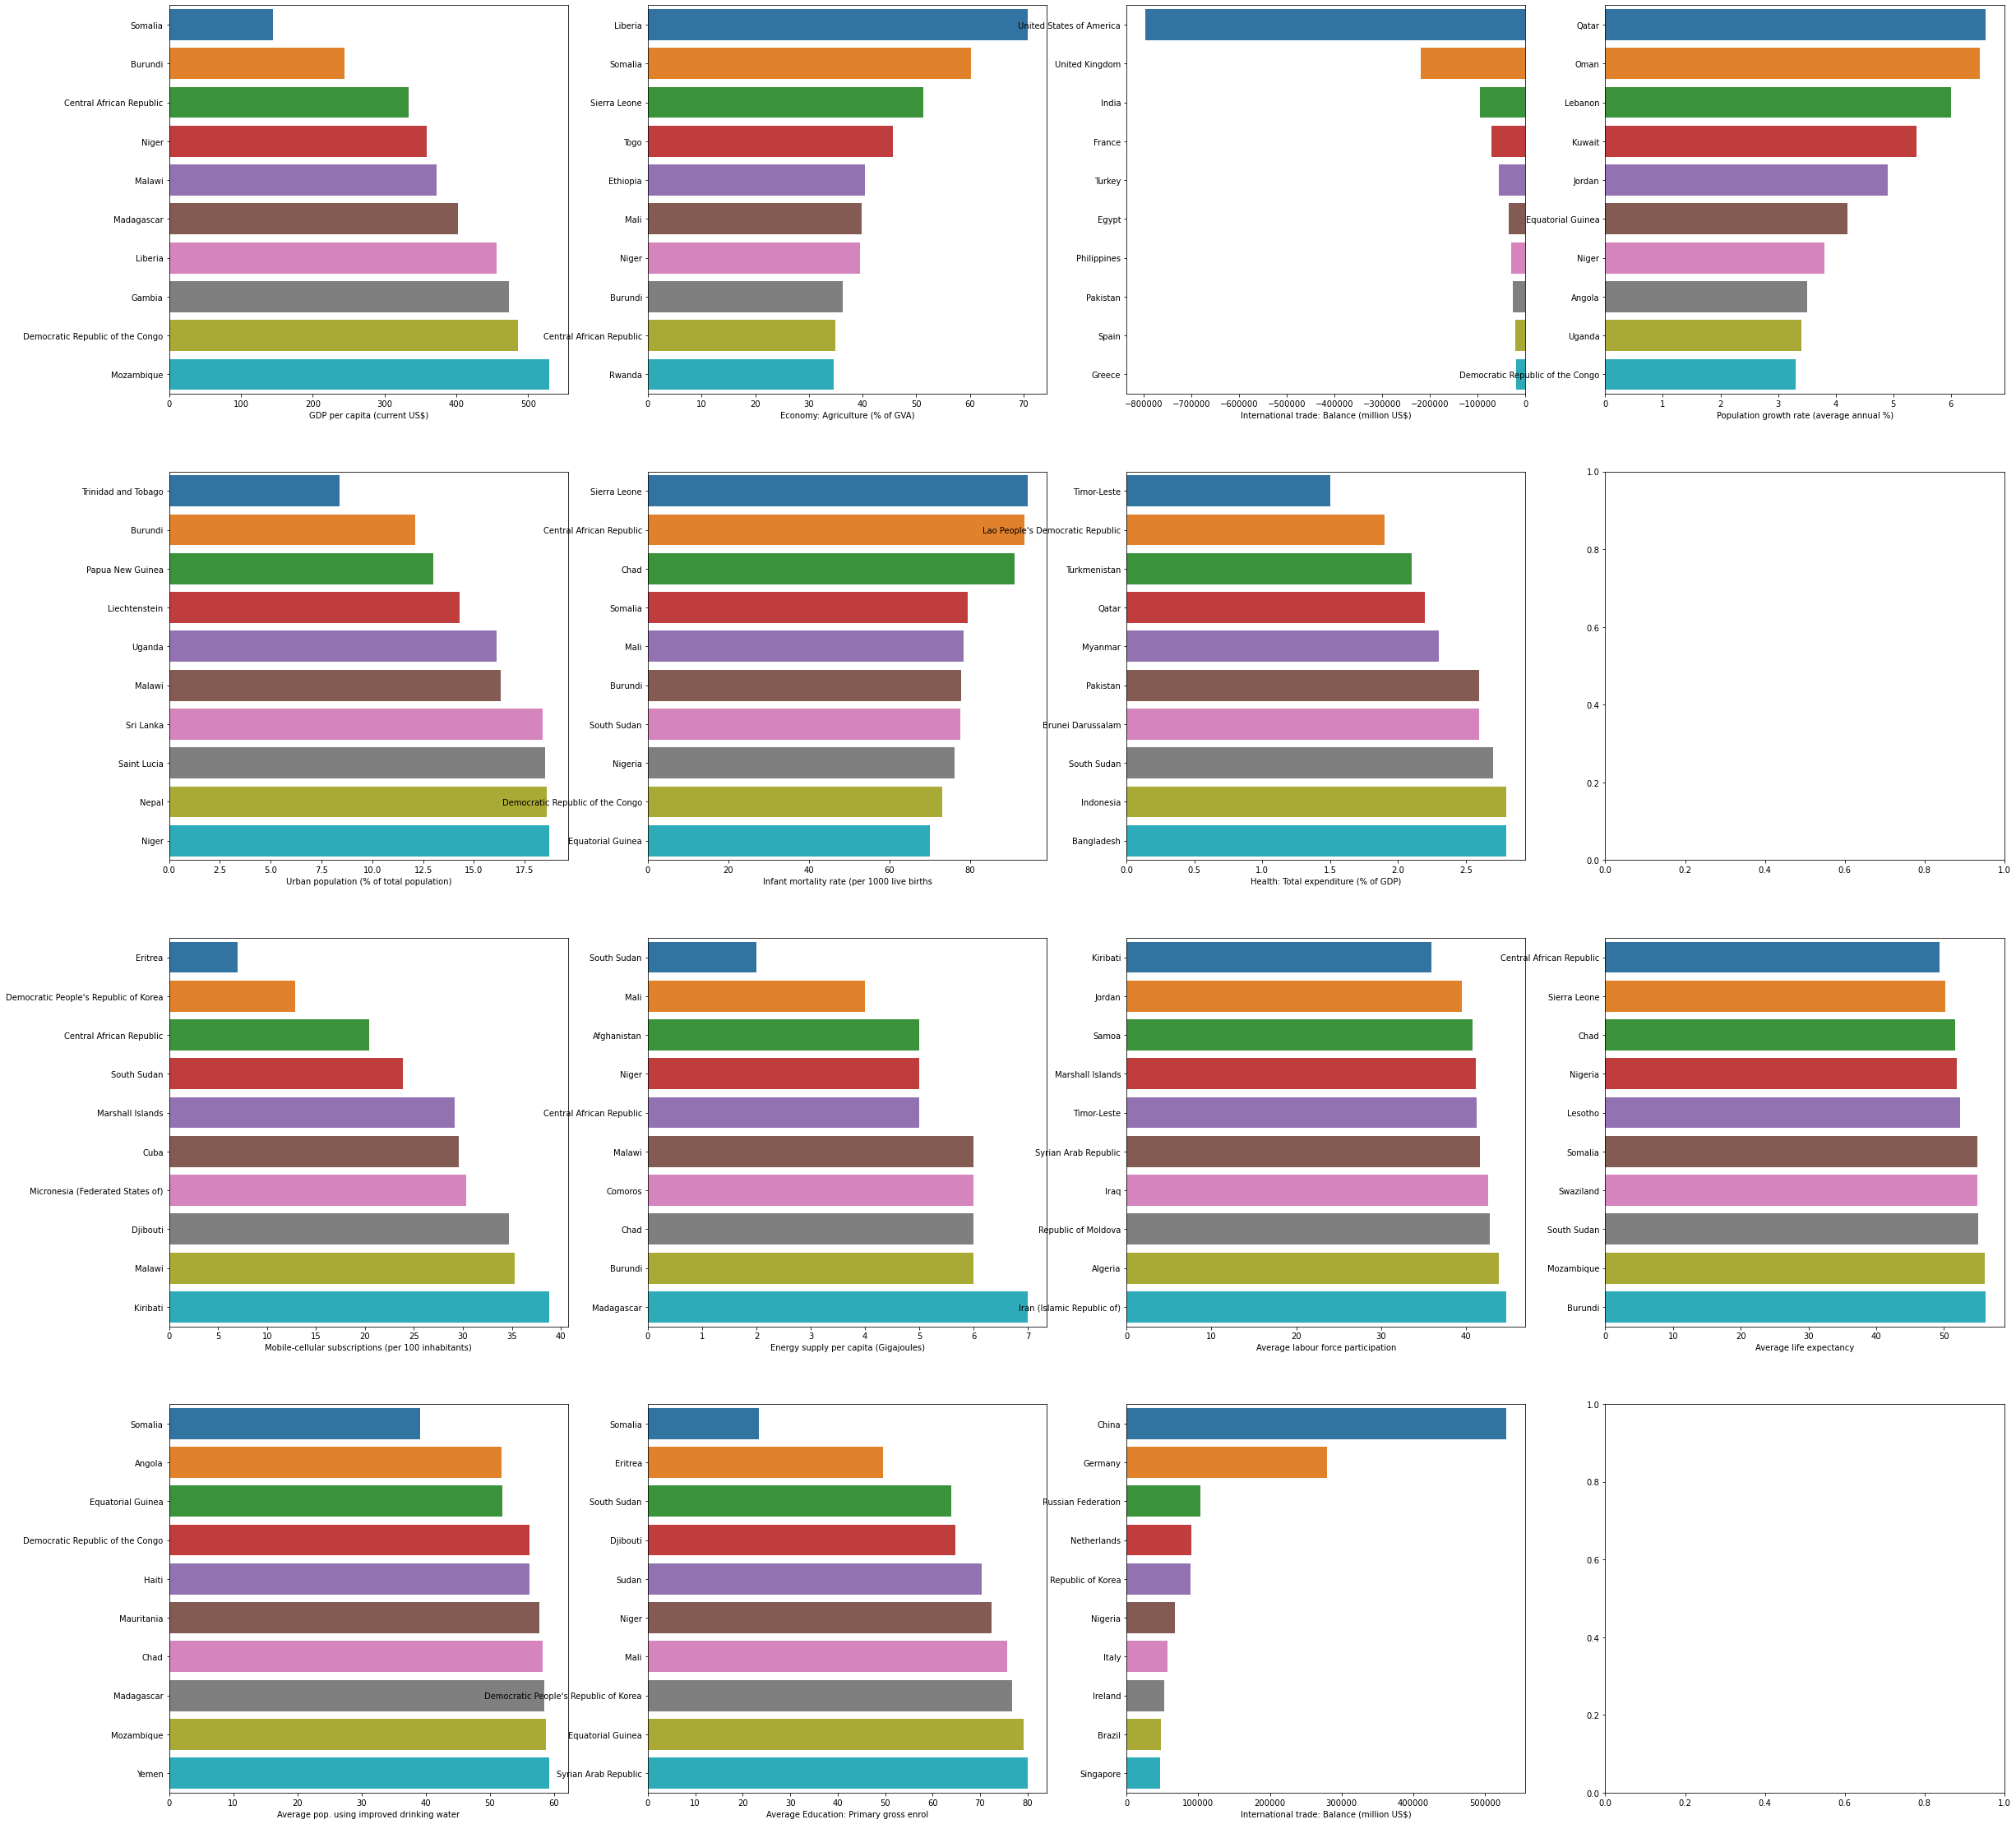

In [435]:
fig, axs = plt.subplots(4,4,figsize = (40,40))
def ten(a,b,c,d):
  pt= raw_data4[['country',a]].sort_values(a, ascending = b).head(10)
  pt1 = sb.barplot(x=a, y='country', data= pt, ax = axs[c,d])
  pt1.set(xlabel = a, ylabel= '')
  
# finding the 10 countries that need the financial aid the most based on each indicator
ten("GDP per capita (current US$)",True,0,0)
ten("Economy: Agriculture (% of GVA)",False,0,1)
ten("International trade: Balance (million US$)",True,0,2)
ten("Population growth rate (average annual %)",False,0,3)
ten("Urban population (% of total population)",True,1,0)
ten("Infant mortality rate (per 1000 live births",False,1,1)
ten("Health: Total expenditure (% of GDP)",True,1,2)
ten("Mobile-cellular subscriptions (per 100 inhabitants)",True,2,0)
ten("Energy supply per capita (Gigajoules)",True,2,1)
ten("Average labour force participation",True,2,2)
ten("Average life expectancy",True,2,3)
ten("Average pop. using improved drinking water",True,3,0)
ten("Average Education: Primary gross enrol",True,3,1)
ten("International trade: Balance (million US$)",False,3,2) # to see if there is an obv distinction in international trade: balance between developed and underdeveloped countries


***Insights:***

- From above bar plot we could see the common countries that have been repeated in more than one areas like Somalia,Liberia, Niger, Burundi, South Sudan. This indicates that there are already a group of countries that require financial aid the most hence clustering would be a good method to identify these countries and anomaly detection for countries that have appeared in the bottom 10 for more than 3 components like Niger  
- There is no clear distinction for underdeveloped and developed countries using the indicator international trade as Singapore is in the top 10 for international trade: Balance while USA is in the bottom 10 despite both being developed countries
- Interestingly the health expenditure(% of GDP) contains both qatar,one of the richest and developed countries and South sudan, an under-developed country hence this may fail to give a proper estimation therefore a better indicator would be health expenditure per capita 

In [438]:
# creating a new column for healthexpenditure per capita
raw_data4["Health expenditure per capita"]=(raw_data4["Health: Total expenditure (% of GDP)"]*raw_data4["GDP per capita (current US$)"])/100
#dropping the previous columns and international trade column
drop2=["Health: Total expenditure (% of GDP)","International trade: Balance (million US$)"]
final_data= raw_data4.copy()
final_data.drop(drop2, axis=1, inplace=True)

In [439]:
#checking if columns have been dropped
final_data.head()


,GDP per capita (current US$),Economy: Agriculture (% of GVA),Population growth rate (average annual %),Urban population (% of total population),Infant mortality rate (per 1000 live births,Mobile-cellular subscriptions (per 100 inhabitants),Energy supply per capita (Gigajoules),country,Region,Average labour force participation,Average life expectancy,Average pop. using improved drinking water,Average Education: Primary gross enrol,Health expenditure per capita
0,623.2,23.3,3.2,26.7,68.6,61.6,5,Afghanistan,SouthernAsia,51.450,62.250,62.60,111.35,51.1024
1,3984.2,22.4,-0.1,57.4,14.6,106.4,36,Albania,SouthernEurope,50.600,77.750,95.05,113.60,235.0678
2,4154.1,12.2,2.0,70.7,27.7,113.0,55,Algeria,NorthernAfrica,43.850,75.300,83.05,116.10,299.0952
4,39896.4,0.5,-1.6,85.1,18.0,88.1,119,Andorra,SouthernEurope,63.625,72.725,100.00,102.80,3231.6084
5,4714.1,6.8,3.5,44.1,65.4,60.8,25,Angola,MiddleAfrica,68.450,60.200,51.80,128.65,155.5653


***Determing if certain regions require greater financial aid than the other***

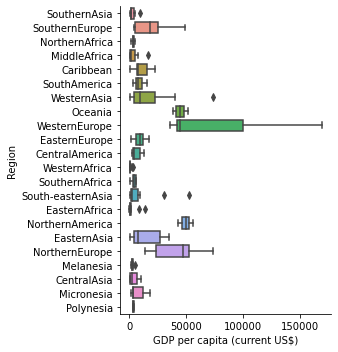

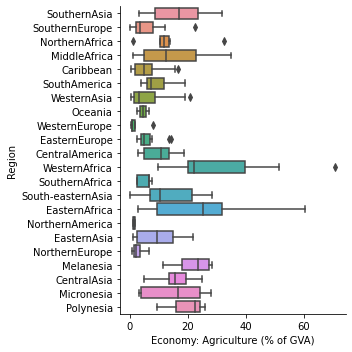

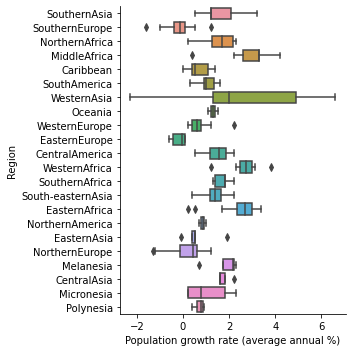

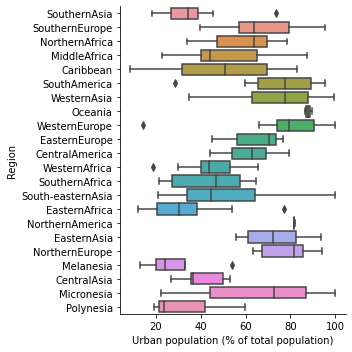

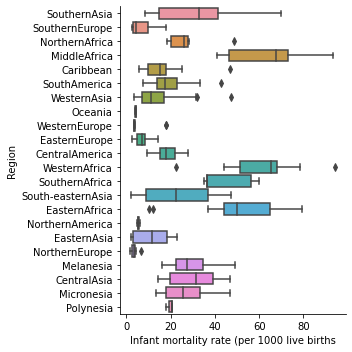

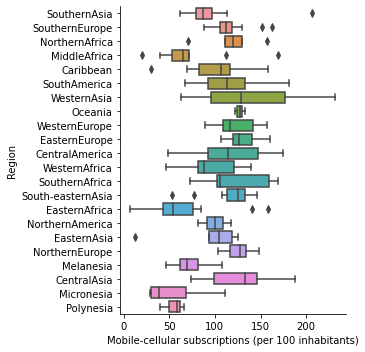

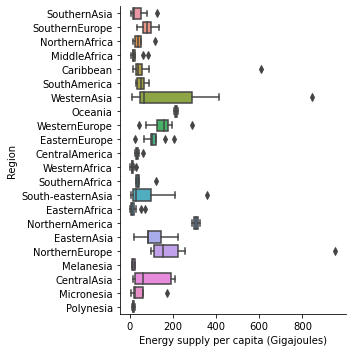

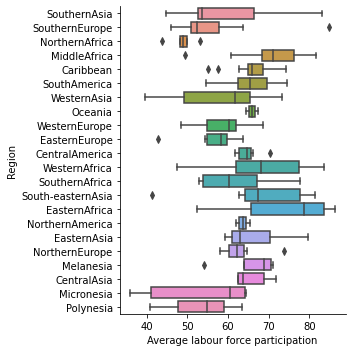

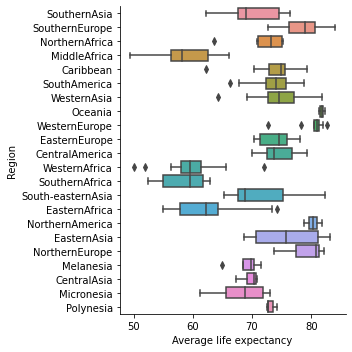

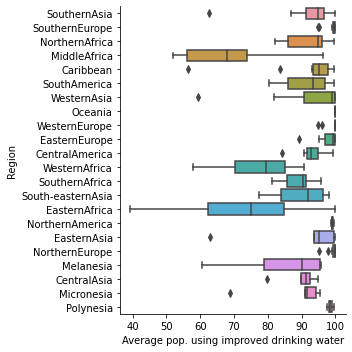

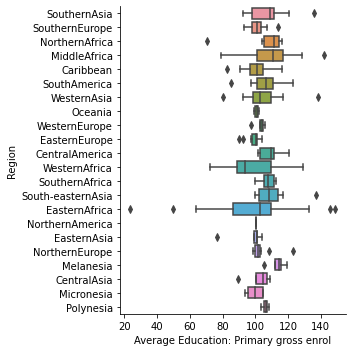

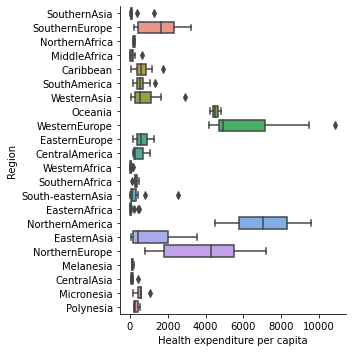

In [448]:
#Looking at catplots across various regions
temp_data=final_data.copy()
drop3=["country"]
temp_data.drop(drop3, axis=1, inplace=True)
temp_data1=temp_data.copy()
drop4=["Region"]
temp_data1.drop(drop4, axis=1, inplace=True)
f=temp_data1.columns
for i in f:
    sb.catplot(x=i, y="Region",kind="box", data=temp_data)


***Insights***  
There are clear differences in the distribution of each element for the different regions with some indicators having a greater disparity such as health expenditure per capita is much higher in northern america compared to the western asia. Some regions are generally poor performing across a few indicators such as middle africa hinting that these regions may require greater financial aid 

# Bivariate analysis
- Looking for relations between different elements 

<AxesSubplot:>

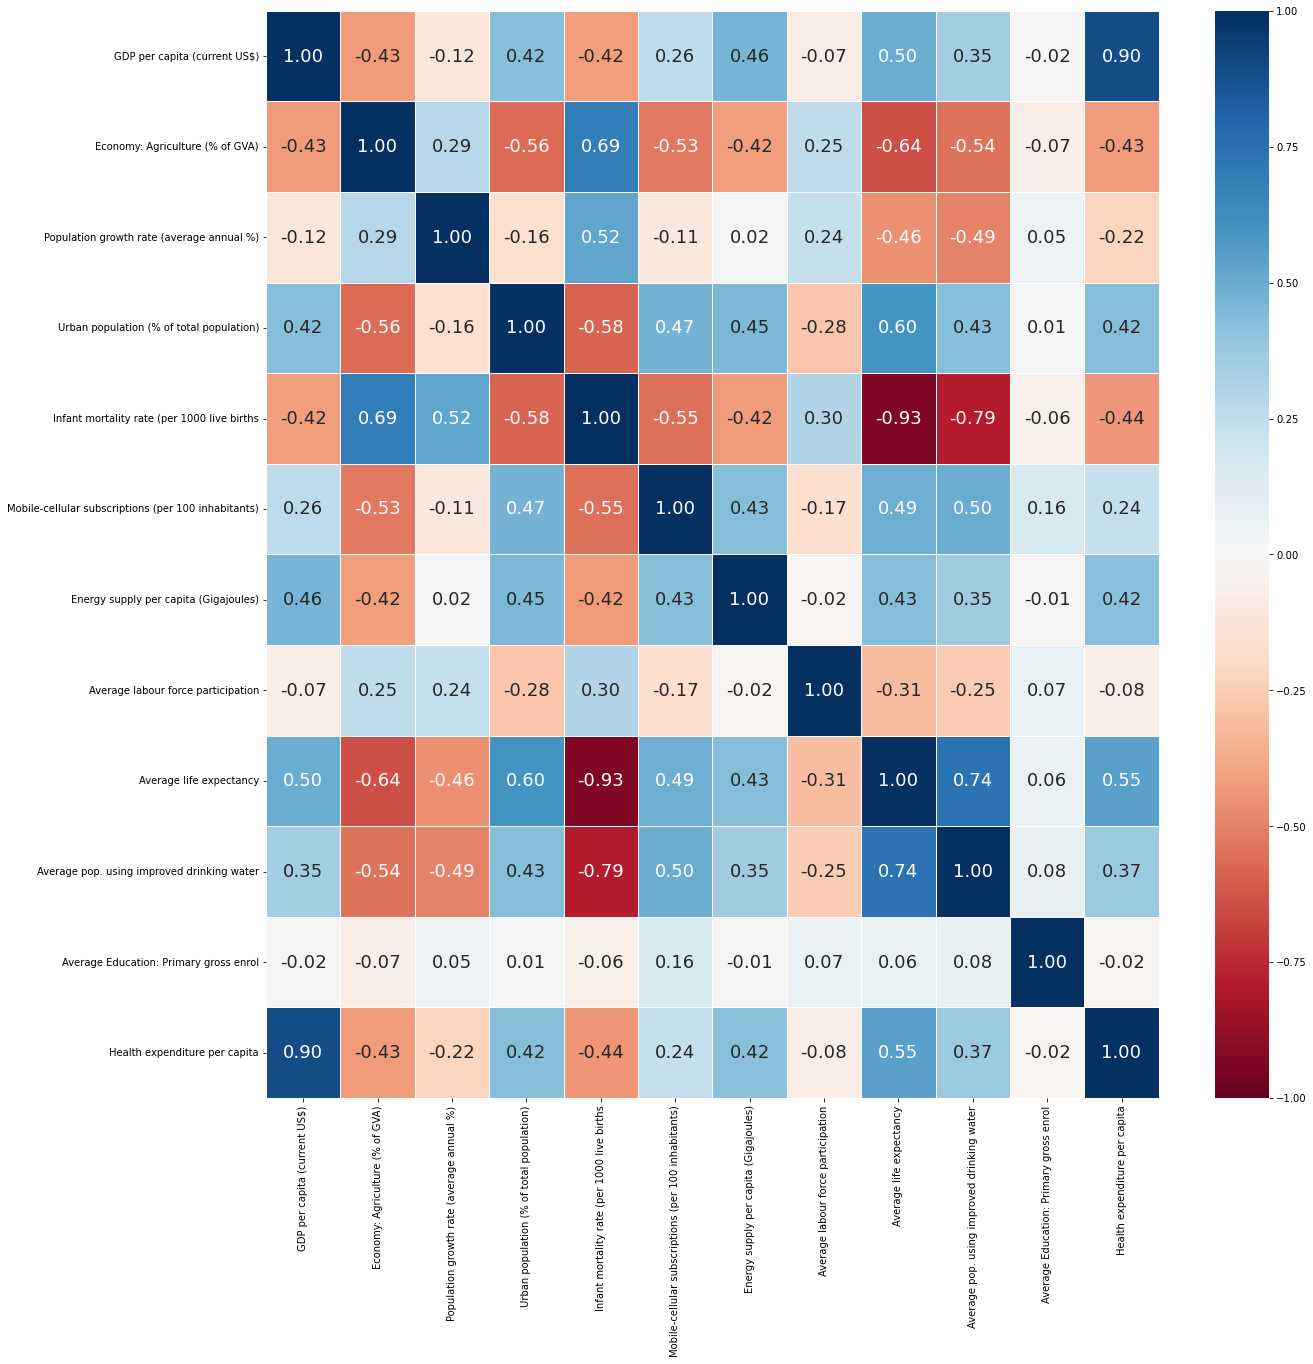

In [449]:
# examine the correlation matrix between the remaining and new columns
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(final_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

***Insights***  
- Most of the columns have average correlation with other columns except for average education: primary gross enrol that has no evident correlation
- Some columns are strongly correlated like GDP with health expenditure showing the relationship between the average income for an individual and the amount country spends on their health and infant mortality rate with pop using improved drinking water


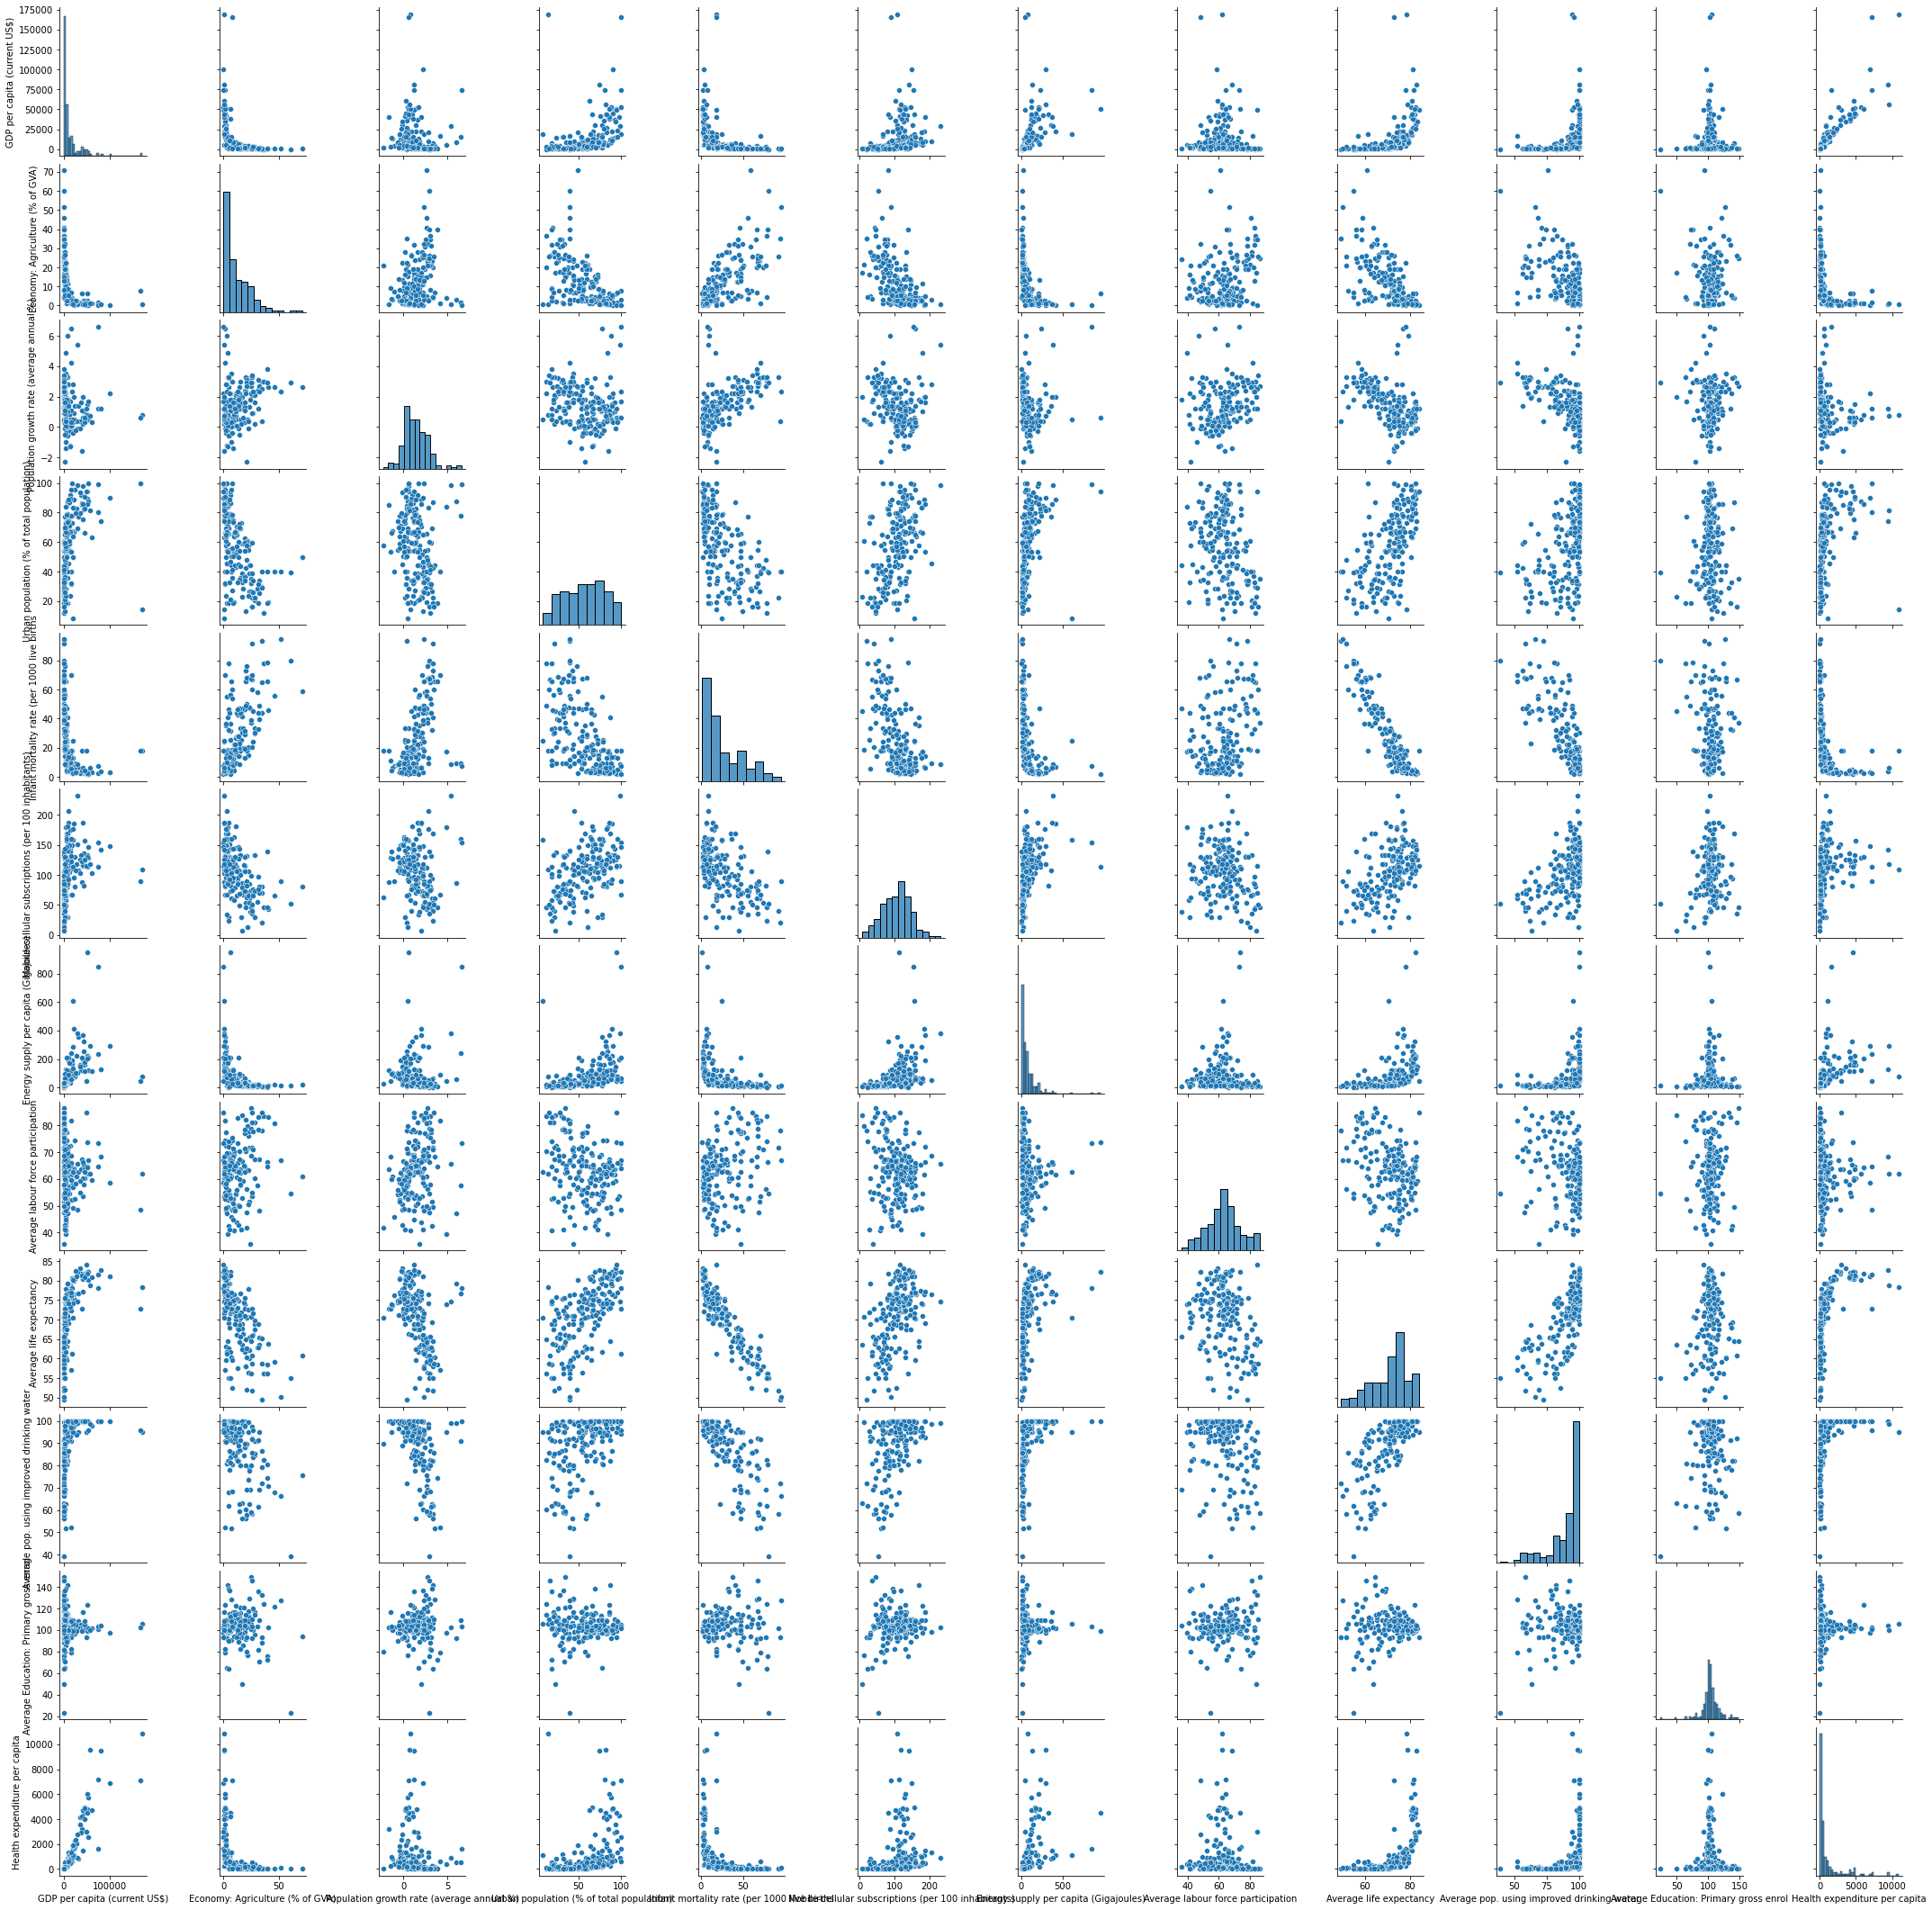

In [450]:
# using pair plots to have a clearer visual
sb.pairplot(data = final_data)

This clearly depicts the relationships between certain variables are negatively correlated such as economy: agriculture and health expenditure. 

***To provide more-in depth and clear analysis we can categorise the countries based on their gdp into 5 categories to compare how the income per capita(strong indicator for a company's need for financial aid) with other columns***

In [460]:
conditions = [
    (final_data['GDP per capita (current US$)'] <= 1000),
    (final_data['GDP per capita (current US$)'] >1000) & (final_data['GDP per capita (current US$)'] <= 3000),
    (final_data['GDP per capita (current US$)'] >3000) & (final_data['GDP per capita (current US$)'] <=5000),
    (final_data['GDP per capita (current US$)'] >5000) & (final_data['GDP per capita (current US$)'] <=10000),
    (final_data['GDP per capita (current US$)'] >10000)
]

values = ['1', '2', '3', '4','5']
temp_data2=final_data.copy()
temp_data2['GDP_category'] = np.select(conditions, values)

#temp_data2.head()

TypeError: invalid entry 0 in condlist: should be boolean ndarray